## When we talk about dask, it is a Python-based parallel computing library that does a lot of things. 
* In this particular notebook material, we go into dask with big data collections, dask bag, dask array, and dask array, which are large parallel versions of Lists, numpy arrays, and pandas data frames.

### Introduction
* Dask offers NumPy and Pandas parallelism at a high level.
* It also has primitives and ad-hoc parallel algorithms (dask.delayed, which is comparable to joblib.delayed). 
* Dask is a parallel computing package for analytics that is both versatile and powerful.The following advantages are highlighted by Dask:


    - Familiar: Provides parallelized NumPy array and Pandas DataFrame objects
    - Native: Enables distributed computing in Pure Python with access to the PyData stack.
    - Fast: Operates with low overhead, low latency, and minimal serialization necessary for fast numerical algorithms
    - Flexible: Supports complex and messy workloads
    - Scales up: Runs resiliently on clusters with 100s of nodes
    - Scales down: Trivial to set up and run on a laptop in a single process
    - Responsive: Designed with interactive computing in mind it provides rapid feedback and diagnostics to aid humans

#### So, at its foundation, dask has a task scheduler, which means that it has small Python routines that all rely on each other, and it runs those Python functions in parallel. That's the basic component of dask, and on top of that, we construct parallel arrays, parallel data frames, and so on.

### The Computational Model of Dask
* Task scheduling and parallel programming
- Known abstractions for running several tasks in parallel on data that doesn't fit in memory
- DataFrames, Arrays
* Graphs of tasks*
- A parallel computation is represented by this diagram.
* Scheduling
- Uses threads or processes to run task graphs in parallel on a single system.
- Dask.distributed provides support for distributed execution.
    - Workflows for the distributed scheduler may differ from those shown here.

**Note**
* Don't utilise a big data tool if you don't have a large data problem.
* With some better choices, many of the instances below might easily be handled in memory.

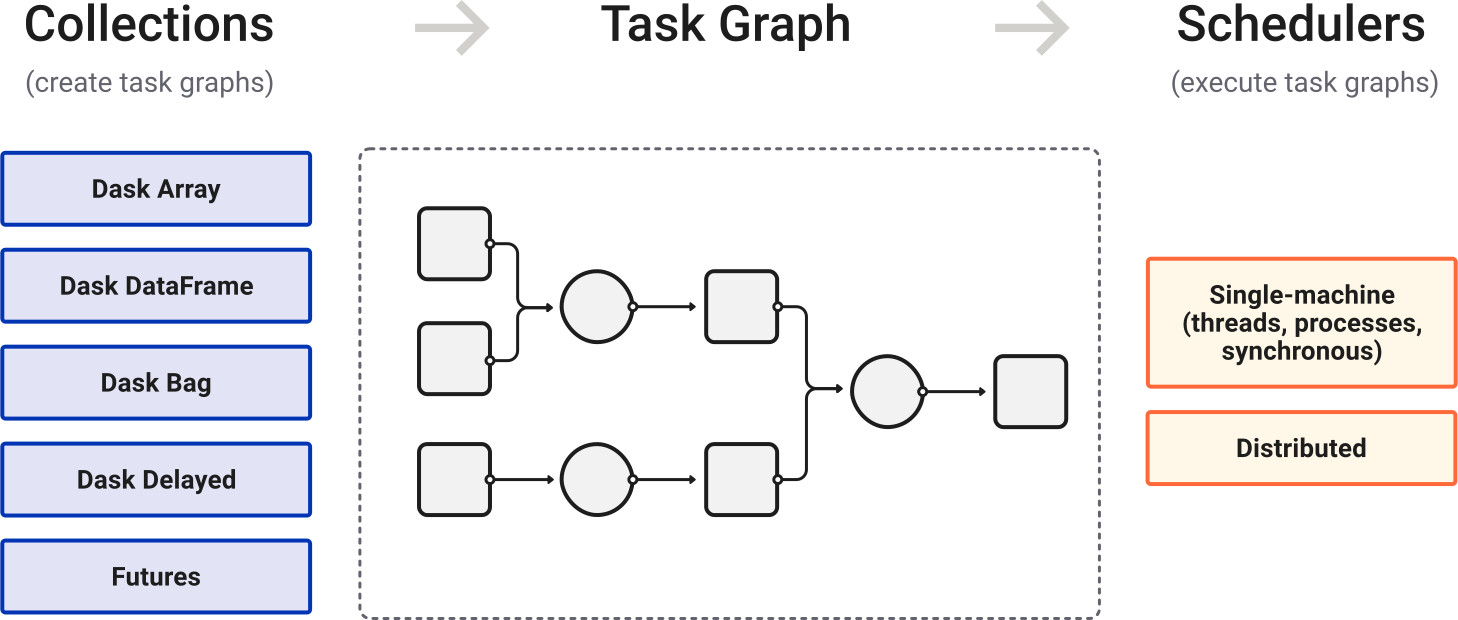

In [2]:

#run the code to visualize the image
from IPython.display import Image,SVG

SVG("https://docs.dask.org/en/stable/_images/dask-overview.svg")

#### As a result, there are three collections: a large parallel array, a large bag similar to Pyspark RDD, and a large data frame similar to a Panda's dataframe. These objects produce task graphs, which are arbitrary collections of Python functions that must run in parallel with dependencies, and we can run any of those collections and a variety of schedulers on a single machine, using many threads or many procedures.

Dask Vs Numpy
- One dask array is composed of many small numpy arrays arranged in a grid
- Collection of array,bag and dataframe for parallelism through dask

* Create a dask array using da.arange analogous to np.arange
* The idea of the chunk is important and has performance implications
* Also, dask-array follows most of the numpy syntax not all but a fairly full subset 

In [ ]:
#!python -m pip install "dask[complete] "  #install everything

In [4]:
import numpy as np
import dask.array as da

In [ ]:
x = np.arange(20)
x
%time x

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [5]:
x = da.arange(20, chunks=(5,))
y = x**2


In [ ]:
x = da.arange(20, chunks=(5,))
y = x**2
y

%time x
%time y

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.06 µs
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


dask.array<pow, shape=(20,), dtype=int64, chunksize=(5,), chunktype=numpy.ndarray>

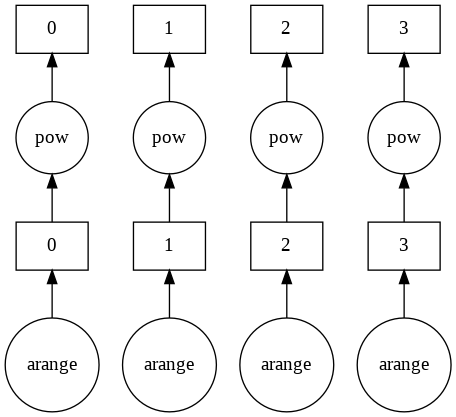

In [ ]:
#import graphviz as gr
y.visualize()

In [ ]:
x.sum()

dask.array<sum-aggregate, shape=(), dtype=int64, chunksize=(), chunktype=numpy.ndarray>

CPU times: user 5.83 ms, sys: 0 ns, total: 5.83 ms
Wall time: 5.63 ms


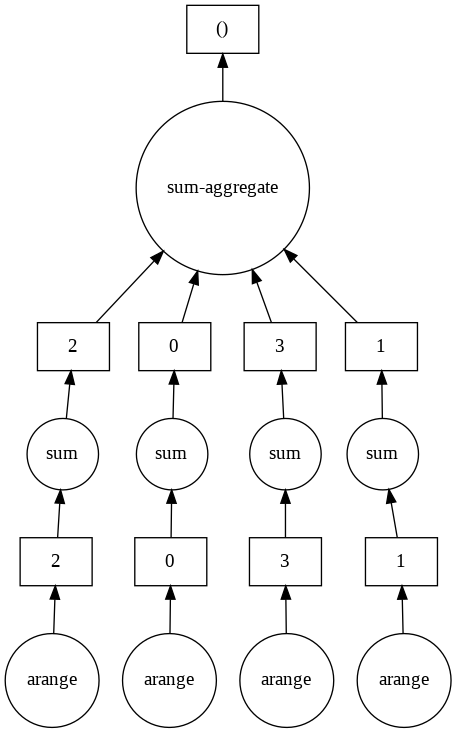

In [ ]:

x.sum().compute()
%time x.sum().compute()
x.sum().visualize()

Look at x.sum(), I would call a range on the bunch of parts, some on all of those pieces, and sum all of those sums, so, above is a method of viewing a computation as a task graph.

* combination is stored internally as a collection of sort of delayed functions, which should appear like gibberish to you, but as technical folks, we want to look at this and see how it's organising or encoding these calculations.

In [6]:
y.dask

HighLevelGraph with 2 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x1fd2a79f7c0>
 0. arange-037f7c3a7241f4f2d4684f53a20fa712
 1. pow-a9287fb0fd83ff44689c92b2f09742c0

In [7]:
y.compute()
%time y.compute()

Wall time: 2 ms


array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144,
       169, 196, 225, 256, 289, 324, 361])

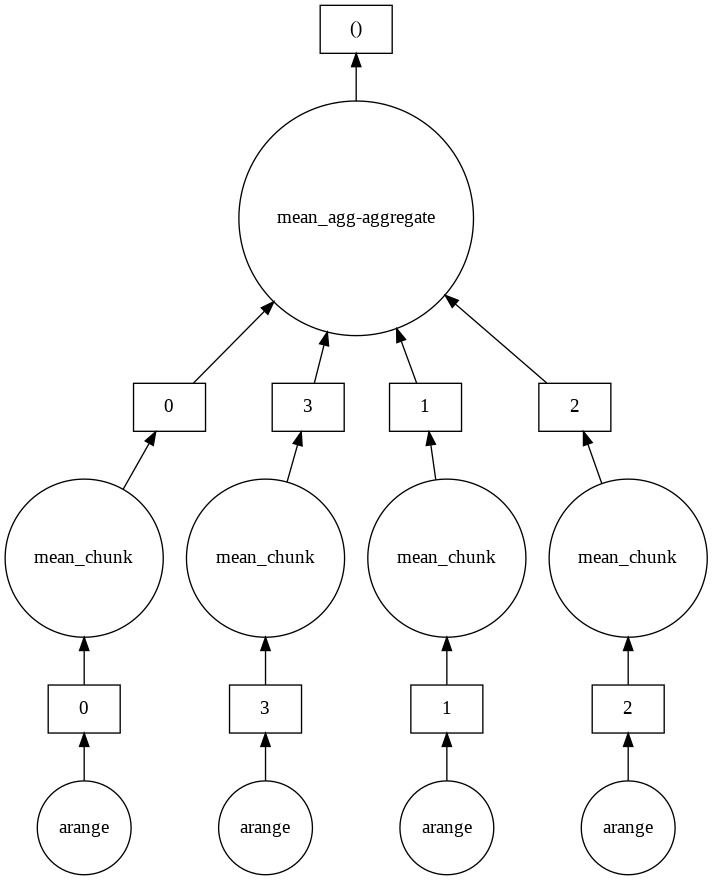

In [ ]:

np.average(x).visualize()

In [ ]:
#np.median(x)
#The da.median function only works along an axis.  The full algorithm is difficult to do in parallel

In [ ]:
(x**2).sum().compute()
%time (x**2).sum().compute()

CPU times: user 10.5 ms, sys: 1.8 ms, total: 12.3 ms
Wall time: 12.5 ms


2470

example-showing how dask array is composing of normal numpy syntax as
a bunch of small numpy functions coordinated together.

## Creating a da.array that has 20 chunks and is made up of the first 2000 numbers and taking the sqaure root of all the elements simultaneously printing Last element

In [ ]:
x= da.arange(2000,chunks=(100,))
x
%time x


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs


dask.array<arange, shape=(2000,), dtype=int64, chunksize=(100,), chunktype=numpy.ndarray>

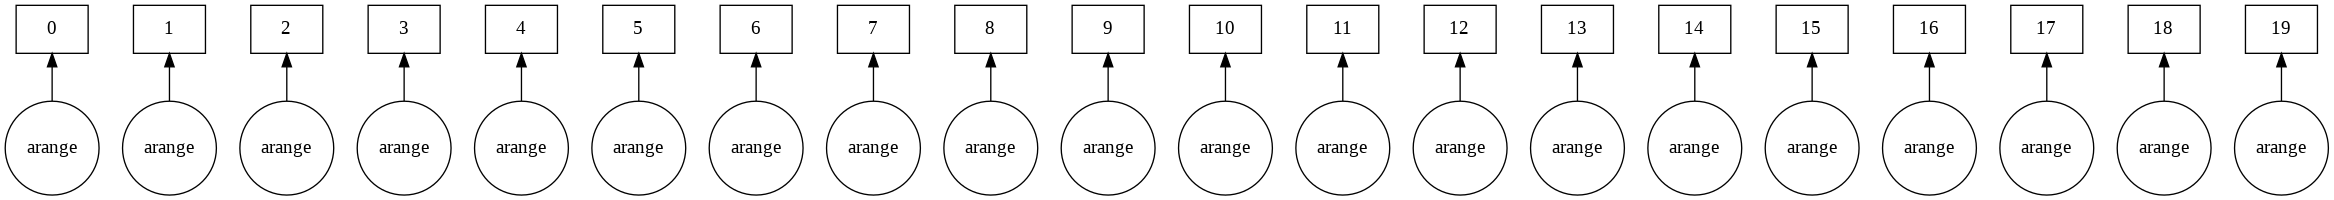

In [ ]:
x.visualize()

One call to Dask arange is like the many calls to numpy arange

In [ ]:
print(da.sqrt(x)[-1].compute())

44.710177812216315


- As dask is a lazy process it needs the execution commad like compute() at the end to process the result,
- similar thing haooens in spark apache 

In [ ]:
print(da.sqrt(x)[::10].compute())

[ 0.          3.16227766  4.47213595  5.47722558  6.32455532  7.07106781
  7.74596669  8.36660027  8.94427191  9.48683298 10.         10.48808848
 10.95445115 11.40175425 11.83215957 12.24744871 12.64911064 13.03840481
 13.41640786 13.78404875 14.14213562 14.49137675 14.83239697 15.16575089
 15.49193338 15.8113883  16.1245155  16.43167673 16.73320053 17.02938637
 17.32050808 17.60681686 17.88854382 18.16590212 18.43908891 18.70828693
 18.97366596 19.23538406 19.49358869 19.74841766 20.         20.24845673
 20.49390153 20.73644135 20.97617696 21.21320344 21.44761059 21.67948339
 21.9089023  22.13594362 22.36067977 22.58317958 22.8035085  23.02172887
 23.23790008 23.4520788  23.66431913 23.87467277 24.08318916 24.2899156
 24.49489743 24.69817807 24.8997992  25.0998008  25.29822128 25.49509757
 25.69046516 25.88435821 26.07680962 26.26785107 26.45751311 26.64582519
 26.83281573 27.01851217 27.20294102 27.38612788 27.5680975  27.74887385
 27.92848009 28.10693865 28.28427125 28.46049894 28.

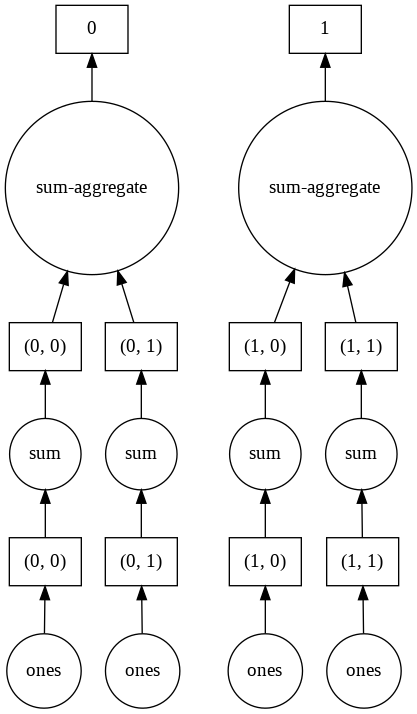

In [ ]:
x = da.ones((10,10),chunks=(5,5))
x.sum(axis=1).visualize()

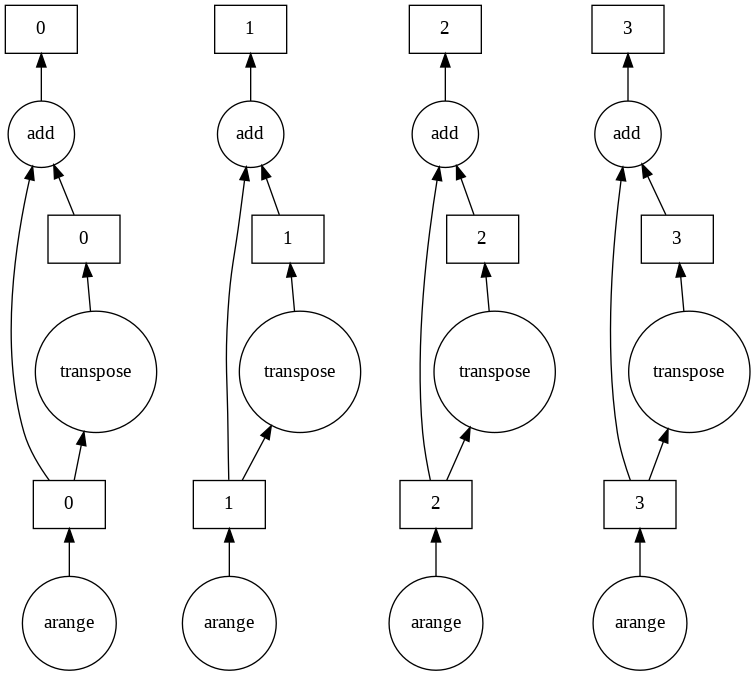

In [ ]:
(x + x.T).visualize()

* **Adding X to its transpose, so it make X to do a sort of flipping around, graphs shows adding different blocks to each other so you see is that on the diagonal blocks add to themselves and off the diagonal ones,they add to their sort of neighboring partners**

Creating a 2 dimensional dask array here
- possible to apply nuerical abilities there after on one of the dimensions in dask 

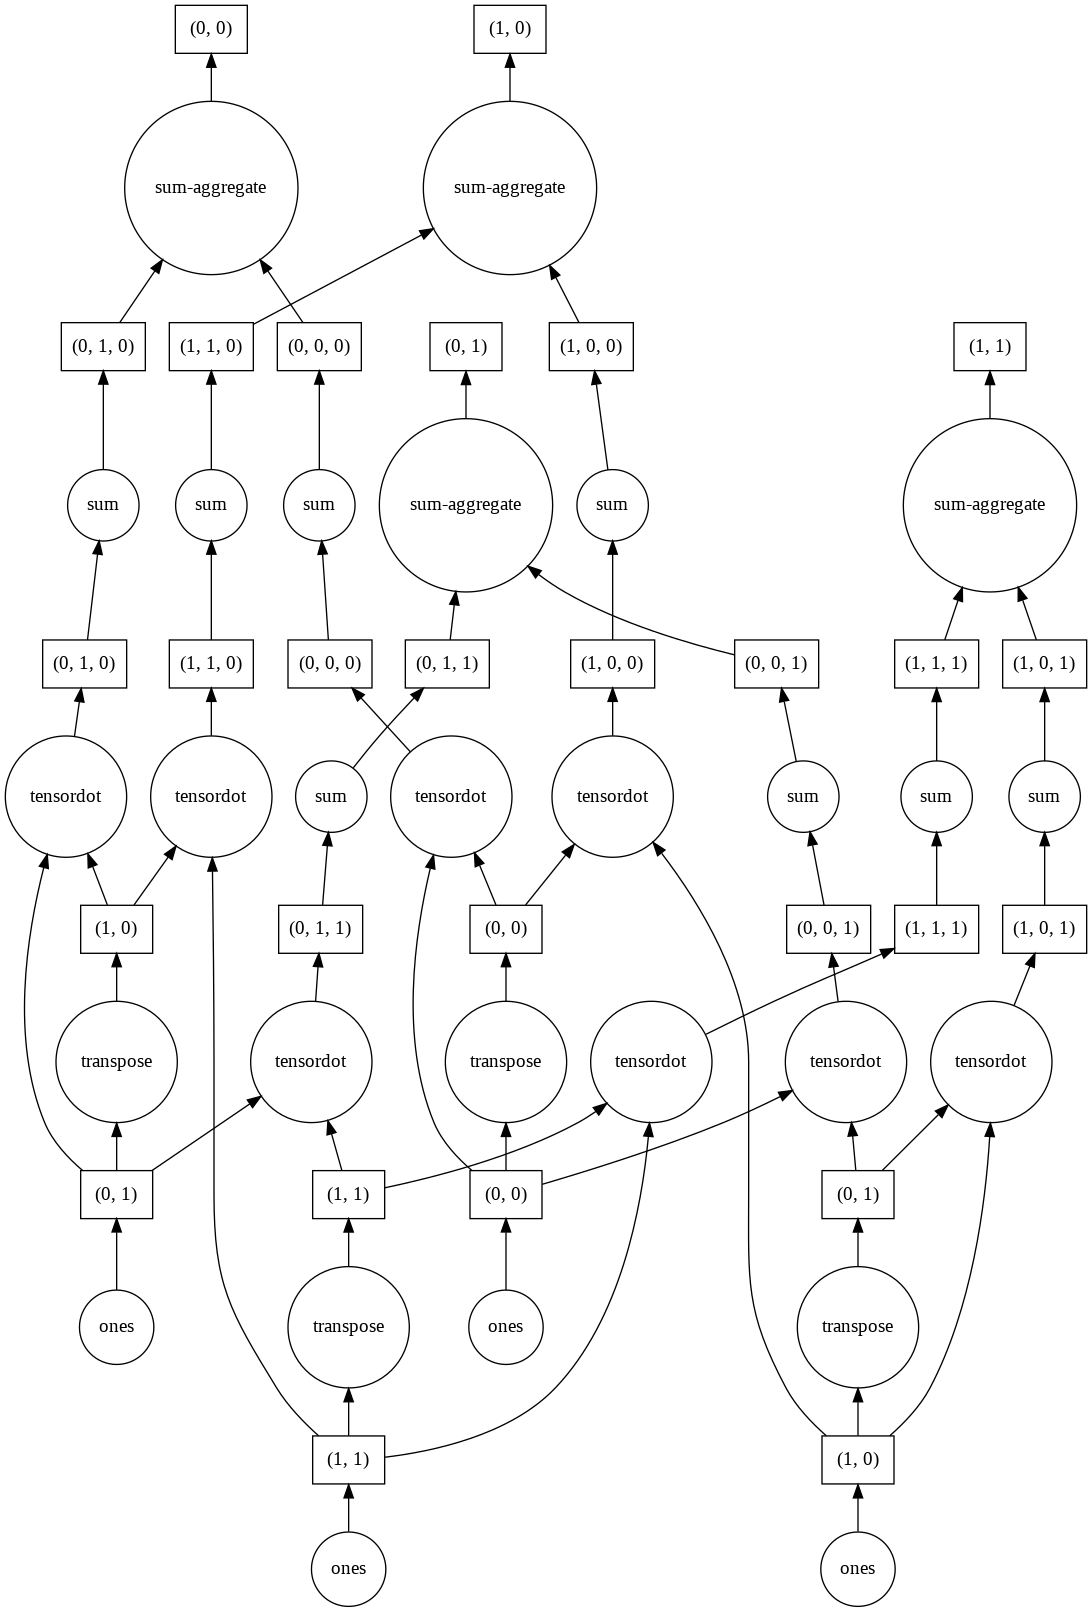

In [ ]:
(x.dot(x.T)).visualize()

- Use of Transpose,Diagonal linking and matrix multiply for visualizing is possible here in.


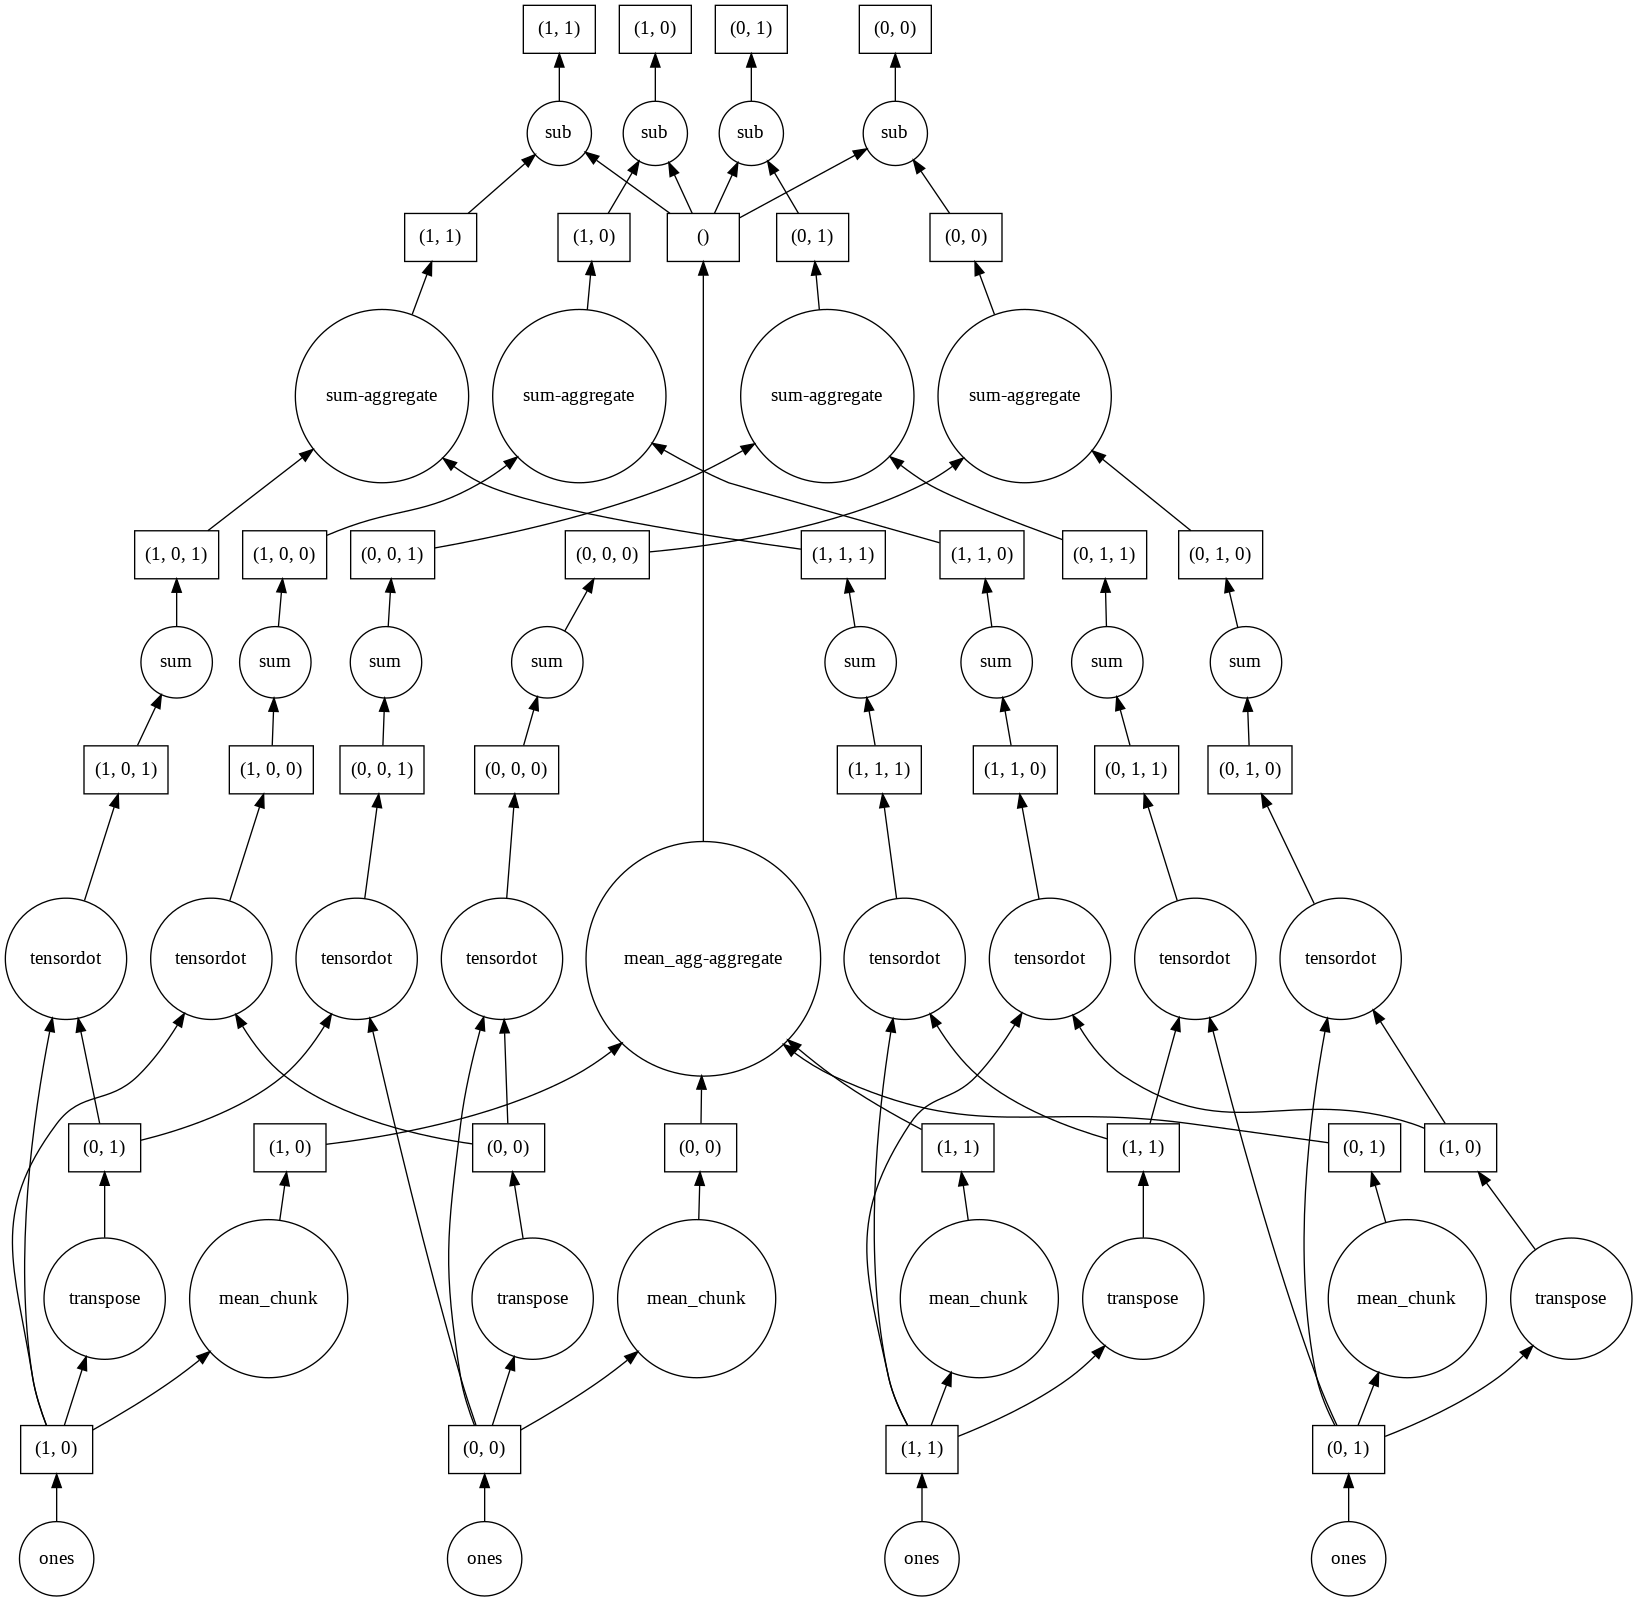

In [ ]:
(x.dot(x.T)-x.mean()).visualize()

We can calculate the mean
- further more make the visulas showing the standard deviation etc and process more complex computation all using dask array

In [ ]:
(x.dot(x.T)-x.mean()).compute()

array([[9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]])

CPU times: user 18.9 ms, sys: 9.37 ms, total: 28.2 ms
Wall time: 543 ms


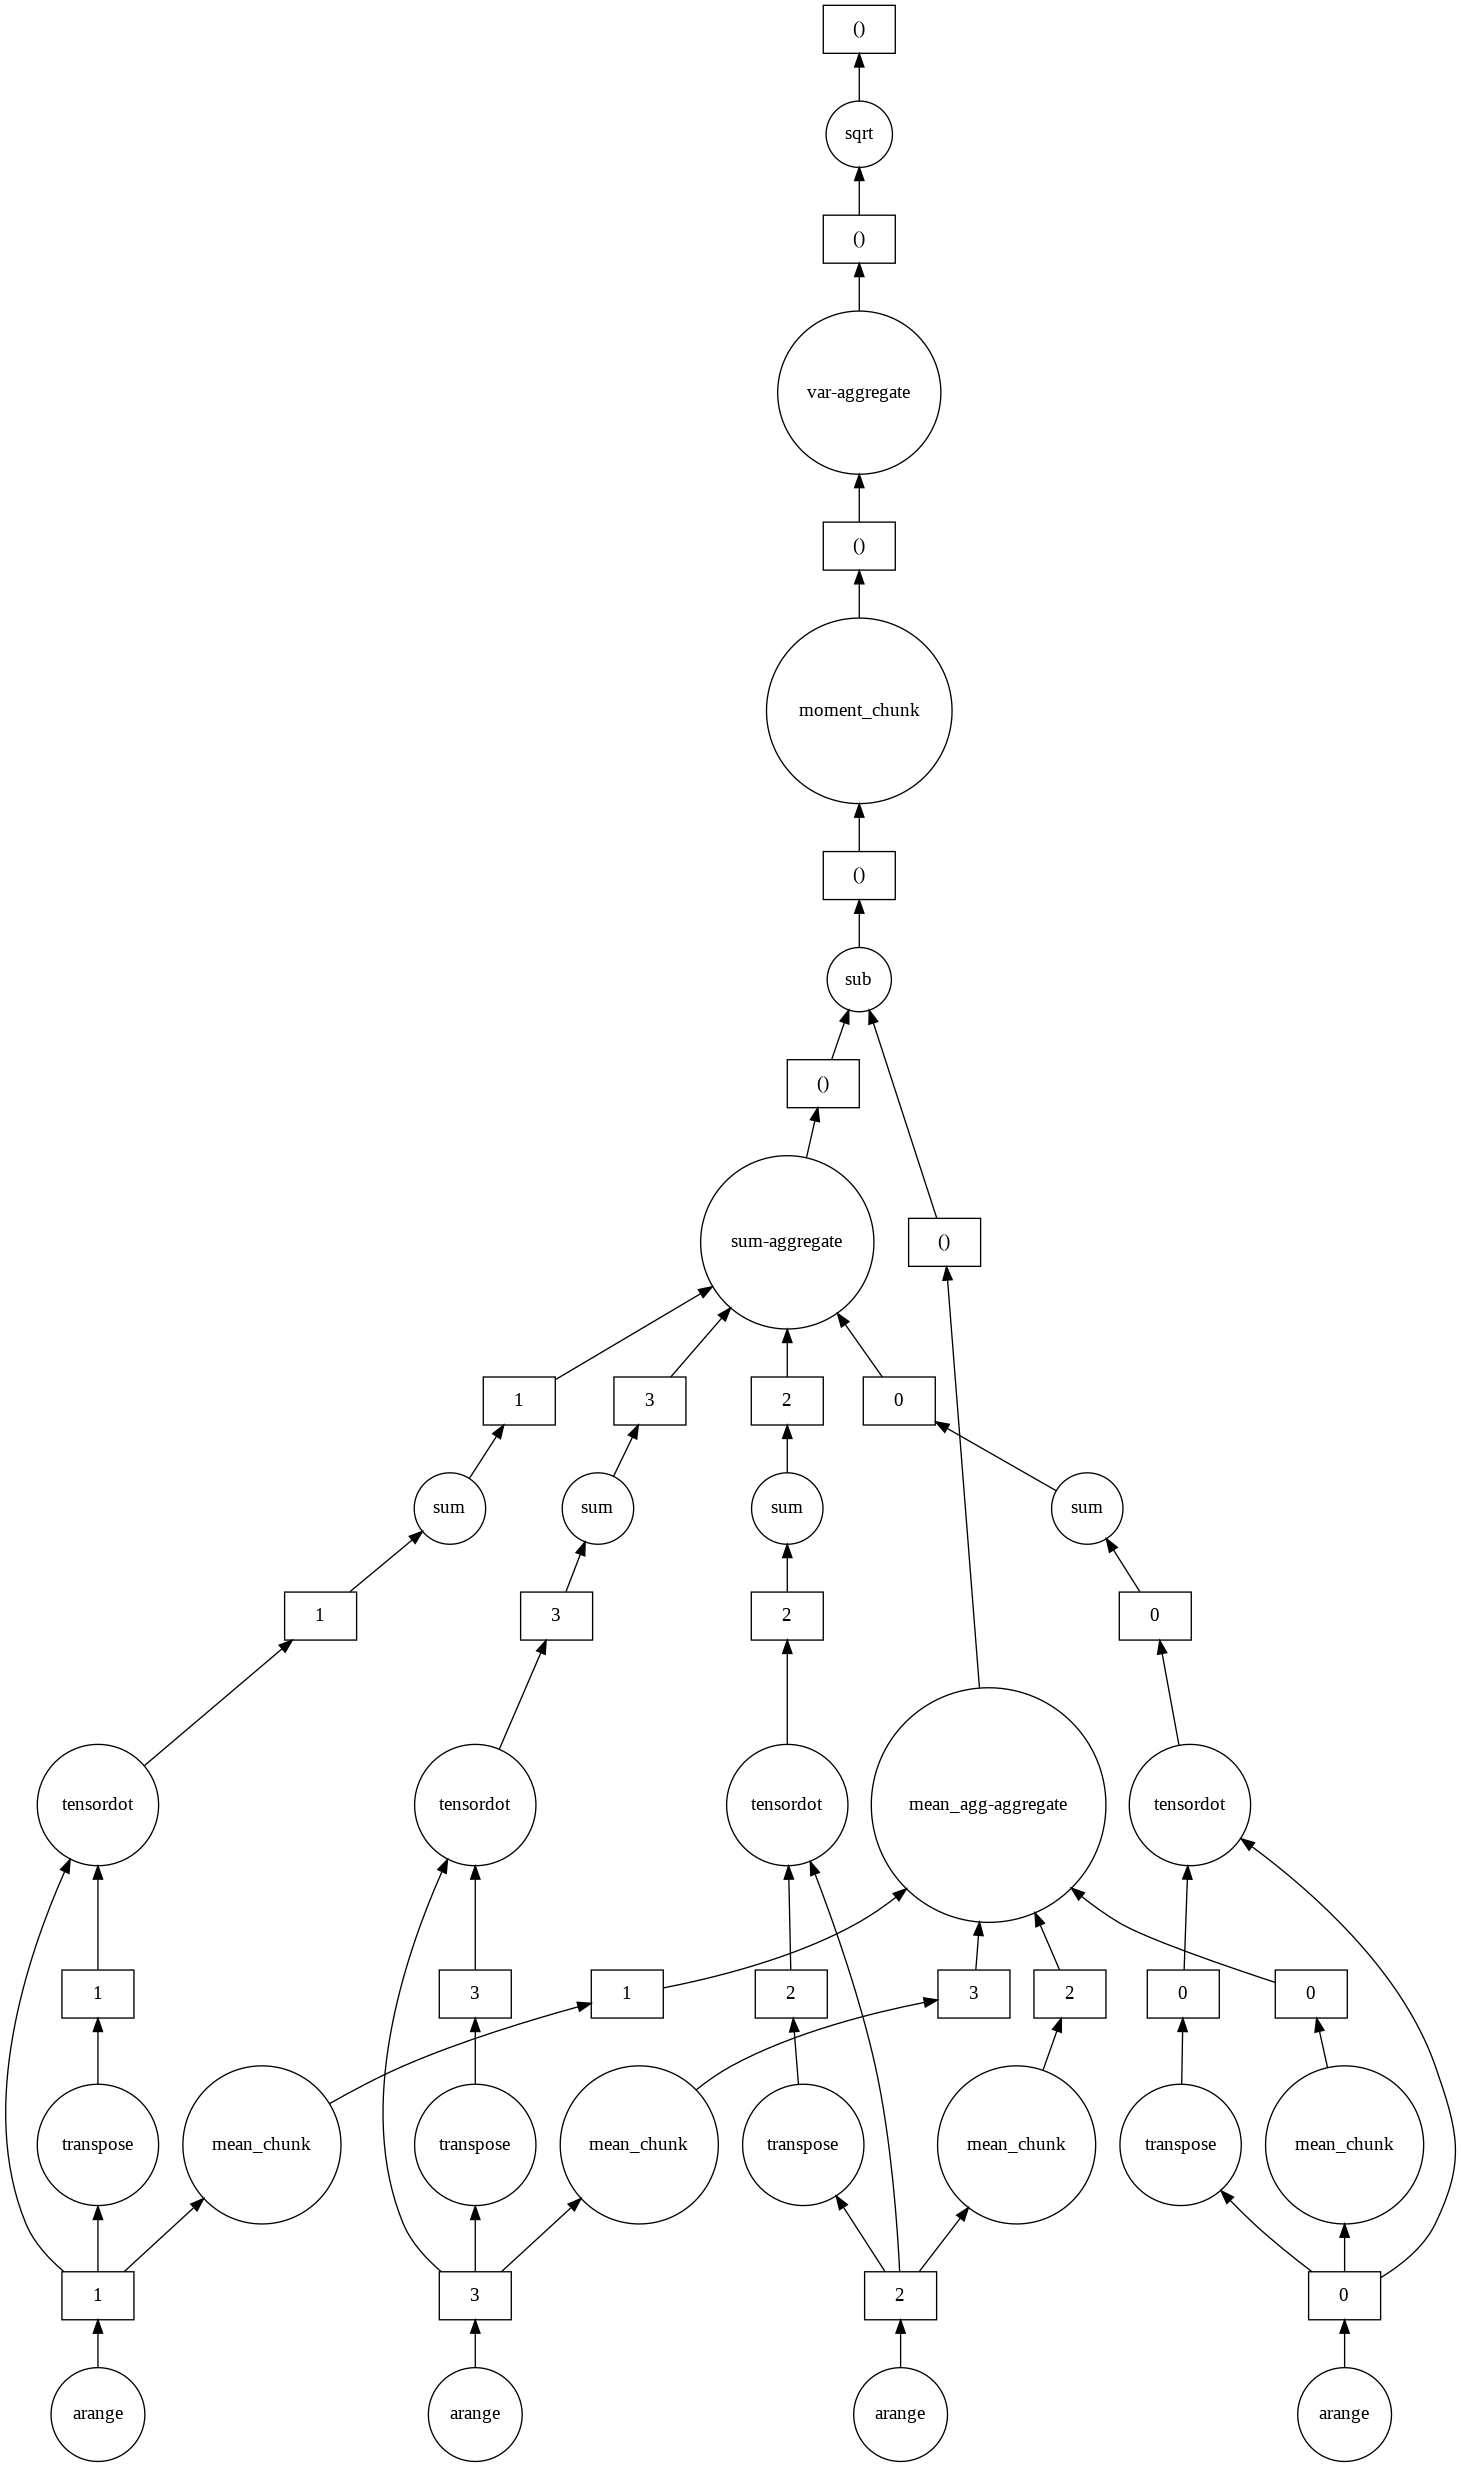

In [ ]:
%%time
(x.dot(x.T)-x.mean()).std().visualize()

* So, we can build these sort of more and more complex computations all using Dask Array, so each of these little circles is actually just a small numpy computation and then when we instead of calling visualize if we call it said compute we are sending lots of threads to run through that graph of computations, execute all those numpy functions, be aware of what sort of dependencies need to be run before others and produce for us the results.
* So this is known dask parallel computing which is still using numpy under the hood so looks like numpy to the user but a sort of is a way to coordinate lots of small numpy arrays to act as a large pole using all the cores of your computer.

In [ ]:
(x.dot(x.T)-x.mean()).std().compute()

0.0

### So, this is about use of threads, dask tends to use a local thread pool but you don't always want to use threads,  you may be using Python code that doesn't work well with threads, maybe it holds on to GIL hence, if you want to processing instead, there's a big question of whether you want threads or processings or you may have a cluster of computers you want to use rather than as your local laptop you may have 100 machines any one or this one a larger computation on those hundred machines so dask ability to create these parallel graphs and dask its ability to compute these graphs is separated as an in Scheduling backend:

### Scheduling Backends
* You have control over the compute scheduler backend, In a few cases, these options can be critical
    - Debugging
    - Fast tasks
    - Cross-task communication

##### Here,  let's just call that z so we can control the scheduler reuse by this **get** keyword argument to the compute method we have a few options the first option here is actually just that the default scheduler which actually just runs in the standard thread for your interpreter

###### There's no parallelism here but it does let you enter into the Python debugger unless you use normal profiling tools sometimes it's nice to not use parallelism and so here we just ran that same computation but inside my local thread rather than in parallel or I can run this with threads and by defaults we're going to use as many threads or processesings as there are logical cores in my computer

- **lets try this out:**

In [15]:
import dask

In [9]:
x = da.ones((10,10),chunks=(5,5))
x.sum(axis=1)

dask.array<sum-aggregate, shape=(10,), dtype=float64, chunksize=(5,), chunktype=numpy.ndarray>

In [10]:
z= (x.dot(x.T)-x.mean()).std()

**Threaded Scheduler**
- dask.threaded.get is the default
,Uses a thread pool backend
- A thread is the smallest unit of work that an OS can schedule
,Threads are "lightweight"*

In [16]:
#z.compute(get=dask.threaded.get)
z.compute(threads=dask.threaded)

[########################################] | 100% Completed |  0.1s


0.0

##### By default, dask will use as many threads as there are logical processors on your machine

In [17]:
from multiprocessing import cpu_count
cpu_count()

8

let's say we had pure Python code that holds on to the Gil so we didn't sort of operate well with with Parallelism in threads, you may have heard of this thing that Python doesn't work well with with parallelism inside of a single process but that's definitely not true for an numpy or pandas code but it is true for pure Python code (list etc) so if your Python code you
may want to use processings instead and we can do that by again adding a different keyword argument ("get=dask.multiprocessing.get")  to this compute method

lets look into this

##### Process Scheduler
 Backend that uses multiprocessing
,Uses a process pool backend

In [18]:
import dask.multiprocessing

z.compute(processes=dask.multiprocessing)

[########################################] | 100% Completed |  0.1s


0.0

#####  there's a distributed scheduler as well you can select to a cluster in your institution and it's very simpler to run the same computation also on that system


**Distributed Executor**
- This is part of the dask.distributed library
- Distributes work over the network across machines using web sockets and an asychronous web framework for Python (tornado)
- Some recent additions make this work for, e.g., distributed DataFrames

In [19]:
from dask.distributed import Client
client = Client(set_as_default=False)  # create local "cluster", don't use as default

In [22]:
z.compute(client=dask.distributed)

[########################################] | 100% Completed |  0.1s


0.0

### Performance vs. NumPy
    - Your performance may vary.

In [2]:
import numpy as np

* Doing this with numpy which has a hindrances one
- it's gonna run inside of one thread so
,it's gonna be fairly slow 
,problems that run around 109 mili-seconds

In [3]:
%%time
x = np.random.normal(10, 0.1, size=(2000, 2000)) 
y = x[::100].mean(axis=0)
y

Wall time: 115 ms


array([ 9.957375  , 10.0336802 , 10.01011885, ...,  9.99253407,
        9.96273899,  9.97465253])

- Dask array is capable of doing all of the random number creation in parallel, which is the present bottleneck in this competition, thus randon around 50 miliseconds. -seeconds

In [5]:
%%time
x = da.random.normal(10, 0.1, size=(2000, 2000), chunks=(1000, 1000))
y = x[::100].mean(axis=0)
y.compute()

Wall time: 53.9 ms


array([10.005494  ,  9.96905899, 10.0108459 , ..., 10.03268373,
       10.00341428, 10.00401649])

### Indicative diagnostics
- To measure performance and provide feedback, use the Dask diagnostics

In [6]:
from dask.diagnostics import ProgressBar, Profiler, ResourceProfiler, visualize

with ProgressBar(), Profiler() as prof, ResourceProfiler() as rprof:
    y.compute()
    
visualize([prof, rprof])

[########################################] | 100% Completed |  0.1s


Column(id='1140', ...)

You can see, so dask has some nice Diagnostics like this progress bar and also has the built diagnosis to show you all the tasks that were run over time, as here we're seeing cores and what they're working on and about the work they were doing for roughly some small pieces over these 53 mili-seconds

We also see CPU and memory use over the same time and something interesting to note is that the memory uses a blue line that never actually exceeds around 100 megabytes so whereas the numpy version needed to sort of store giga/mega-byte array in RAM while dask is able to sort of process fairly aggressively 

progress bar: found it really useful for sorting the things for generating a feedback

**Progressbar**
- If you want the progress bar to be visible at all times, take these steps:

    "ProgressBar().register()"

In [13]:
ProgressBar().register()

In [33]:
#applying on the run code to see what result it produces:

%time
x = da.random.normal(10, 0.1, size=(2000, 2000), chunks=(1000, 1000))
y = x[::100].mean(axis=0)
y.compute()


Wall time: 0 ns
[########################################] | 100% Completed |  0.1s


array([ 9.99459635,  9.98088327, 10.00138329, ..., 10.01425149,
        9.98961413, 10.00691259])

##### Having the progress bar, giving me feedback of when I should expect things to finish is a excellent attribute little tip of dask

# Thank You